In [27]:
import pandas as pd

In [28]:
songs_df = pd.read_csv("taylor_all_songs.csv")

In [29]:
print(songs_df.head())

     album_name     ep album_release  track_number              track_name  \
0  Taylor Swift  False    24/10/2006           1.0              Tim McGraw   
1  Taylor Swift  False    24/10/2006           2.0         Picture To Burn   
2  Taylor Swift  False    24/10/2006           3.0  Teardrops On My Guitar   
3  Taylor Swift  False    24/10/2006           4.0   A Place In This World   
4  Taylor Swift  False    24/10/2006           5.0             Cold As You   

         artist featuring bonus_track promotional_release single_release  ...  \
0  Taylor Swift       NaN       False                 NaN      19/6/2006  ...   
1  Taylor Swift       NaN       False                 NaN       3/2/2008  ...   
2  Taylor Swift       NaN       False                 NaN      19/2/2007  ...   
3  Taylor Swift       NaN       False                 NaN            NaN  ...   
4  Taylor Swift       NaN       False                 NaN            NaN  ...   

  liveness  valence    tempo  time_signature

In [31]:
albums_df = pd.read_csv("taylor_albums.csv")
print(albums_df.head())

                            album_name     ep album_release  metacritic_score  \
0                         Taylor Swift  False    24/10/2006              67.0   
1  The Taylor Swift Holiday Collection   True    14/10/2007               NaN   
2                       Beautiful Eyes   True     15/7/2008               NaN   
3                             Fearless  False    11/11/2008              73.0   
4                            Speak Now  False    25/10/2010              77.0   

   user_score  
0         8.5  
1         NaN  
2         NaN  
3         8.4  
4         8.6  


In [32]:
albums_songs_df = pd.read_csv("taylor_album_songs.csv")
print(albums_songs_df.head())

     album_name     ep album_release  track_number              track_name  \
0  Taylor Swift  False    24/10/2006             1              Tim McGraw   
1  Taylor Swift  False    24/10/2006             2         Picture To Burn   
2  Taylor Swift  False    24/10/2006             3  Teardrops On My Guitar   
3  Taylor Swift  False    24/10/2006             4   A Place In This World   
4  Taylor Swift  False    24/10/2006             5             Cold As You   

         artist featuring  bonus_track promotional_release single_release  \
0  Taylor Swift       NaN        False                 NaN      19/6/2006   
1  Taylor Swift       NaN        False                 NaN       3/2/2008   
2  Taylor Swift       NaN        False                 NaN      19/2/2007   
3  Taylor Swift       NaN        False                 NaN            NaN   
4  Taylor Swift       NaN        False                 NaN            NaN   

   ... liveness  valence    tempo  time_signature  duration_ms  expl

Given the data in these files, there are several analyses we can conduct:
- The evolution of her music over time (based on album release dates).
- The distribution of musical attributes like danceablity, energy, tempo, etc..
- Trends in collaboration with other artists (featured artists).
- The relationships between critical reception (Metacritic scores) and user scores.
- Patterns in the release of singles and promotional tracks.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Analysis 1: Evolution of her music over time
# Count of songs per album
songs_per_album = songs_df.groupby('album_name')['track_name'].count()

In [37]:
# Analysis 2: Distribution of musical attributes
# Selecting relevant columns for distribution analysis
musical_attributes = ['danceability', 'energy', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness']
musical_attr_df = songs_df[musical_attributes]

In [39]:
# Analysis 3: Trends in collaboration with other artists
# Counting the number of collaborations per album
collaborations_per_album = songs_df[songs_df['featuring'].notna()].groupby('album_name')['single_release'].count()

In [40]:
# Analysis 4: Relationship between critical reception and user scores
# Merging albums data with user and metacritic scores
album_scores = albums_df[['album_name', 'metacritic_score', 'user_score']]

In [41]:
# Analysis 5: Patterns in the release of singles and promotional tracks
# Counting the number of singles and promotional releases per album
singles_per_album = songs_df[songs_df['single_release'].notna()].groupby('album_name')['single_release'].count()
promotional_per_album = songs_df[songs_df['promotional_release'].notna()].groupby('album_name')['promotional_release'].count()

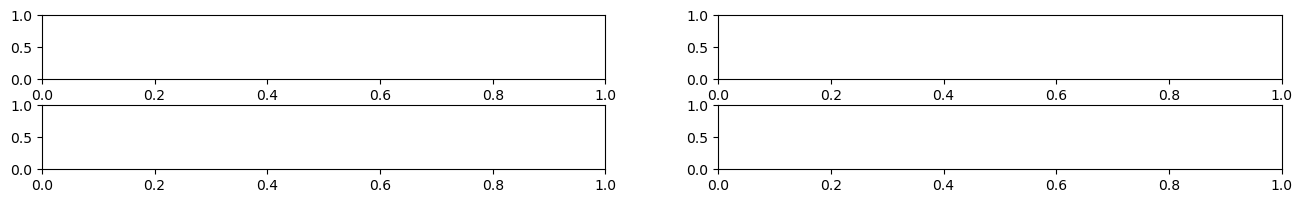

In [53]:
# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(16,2))
plt.subplots_adjust(hspace=0.4)

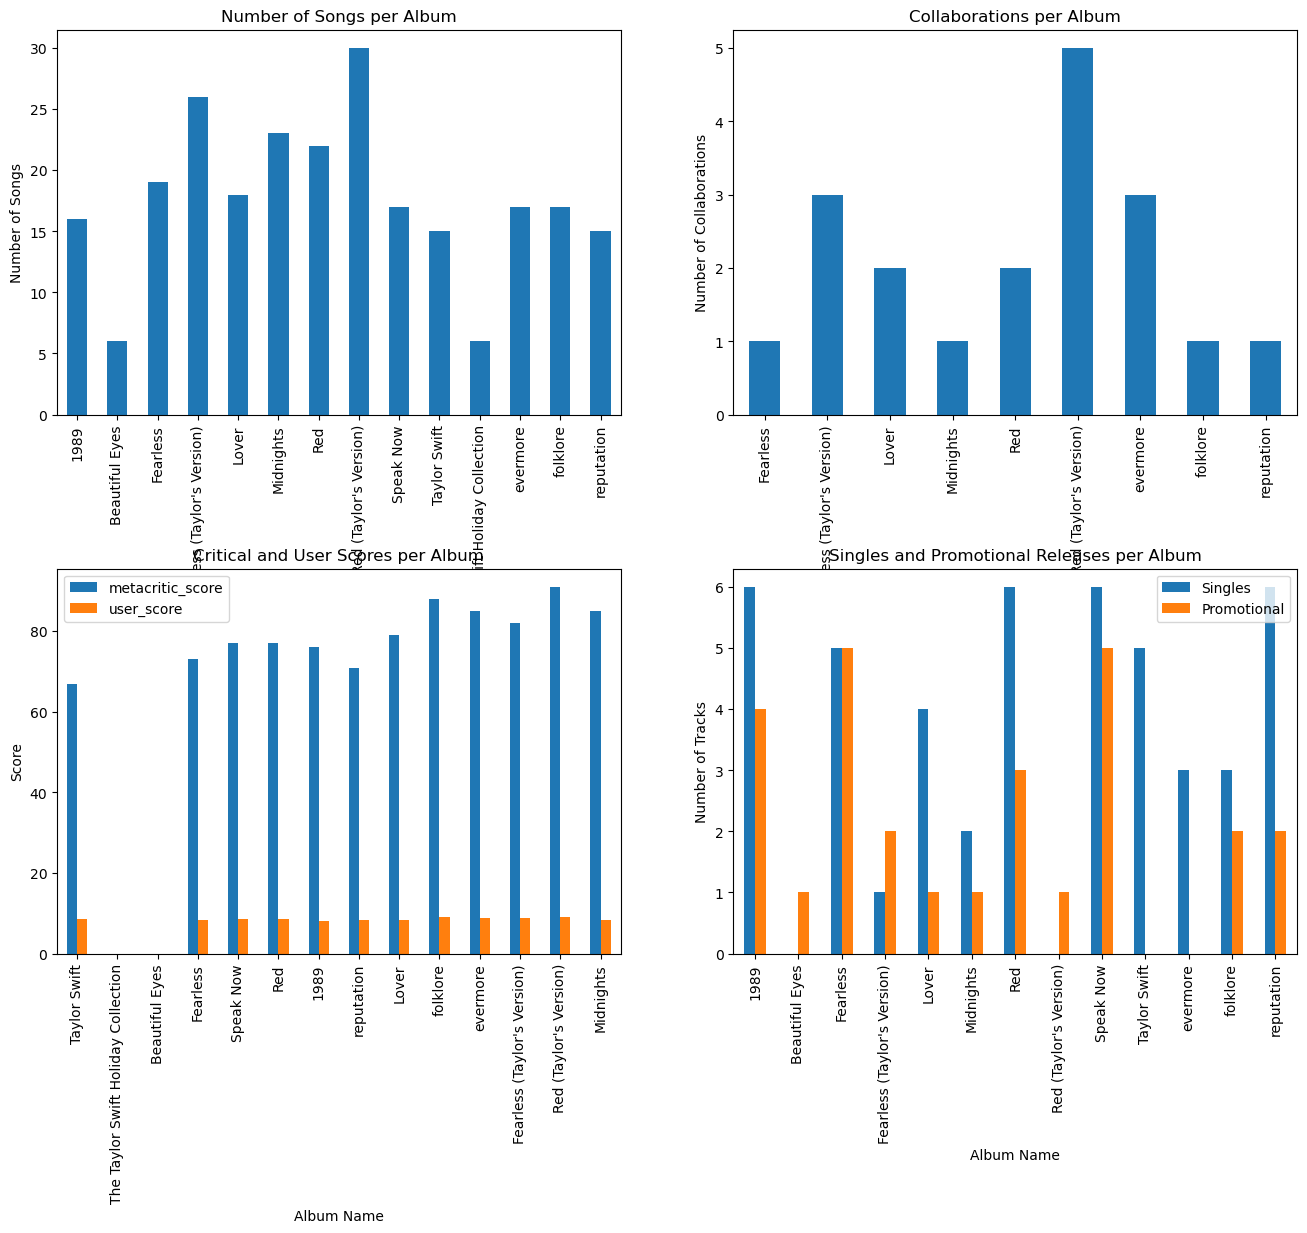

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert release dates to datetime for analysis
songs_df['album_release'] = pd.to_datetime(songs_df['album_release'])
albums_df['album_release'] = pd.to_datetime(albums_df['album_release'])
albums_songs_df['album_release'] = pd.to_datetime(albums_songs_df['album_release'])

# Analysis 1: Evolution of her music over time
# Count of songs per album
songs_per_album = songs_df.groupby('album_name')['track_name'].count()

# Analysis 2: Distribution of musical attributes
# Selecting relevant columns for distribution analysis
musical_attributes = ['danceability', 'energy', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness']
musical_attr_df = songs_df[musical_attributes]

# Analysis 3: Trends in collaboration with other artists
# Counting the number of collaborations per album
collaborations_per_album = songs_df[songs_df['featuring'].notna()].groupby('album_name')['featuring'].count()

# Analysis 4: Relationship between critical reception and user scores
# Merging albums data with user and metacritic scores
album_scores = albums_df[['album_name', 'metacritic_score', 'user_score']]

# Analysis 5: Patterns in the release of singles and promotional tracks
# Counting the number of singles and promotional releases per album
singles_per_album = songs_df[songs_df['single_release'].notna()].groupby('album_name')['single_release'].count()
promotional_per_album = songs_df[songs_df['promotional_release'].notna()].groupby('album_name')['promotional_release'].count()

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4)

# Plot for Analysis 1
songs_per_album.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Number of Songs per Album')
axes[0, 0].set_xlabel('Album Name')
axes[0, 0].set_ylabel('Number of Songs')

# Plot for Analysis 3
collaborations_per_album.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Collaborations per Album')
axes[0, 1].set_xlabel('Album Name')
axes[0, 1].set_ylabel('Number of Collaborations')

# Plot for Analysis 4
album_scores.plot(x='album_name', y=['metacritic_score', 'user_score'], kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Critical and User Scores per Album')
axes[1, 0].set_xlabel('Album Name')
axes[1, 0].set_ylabel('Score')

# Plot for Analysis 5
singles_promotional_df = pd.DataFrame({'Singles': singles_per_album, 'Promotional': promotional_per_album})
singles_promotional_df.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Singles and Promotional Releases per Album')
axes[1, 1].set_xlabel('Album Name')
axes[1, 1].set_ylabel('Number of Tracks')

plt.show()

1. Evolution of Music Over Time:
The bar chart depicted the number of songs in each of Taylor Swift's albums. This can reveal trends like increase or decrease in the number of songs over time.

2. Trends in Collaboration with Other Artists:
The chart showed the number of collaborations (featuring other artists) per album. This can indicate how her collaboration trends have varied across her career.

3. Critical and User Scores per Album:
This comparison chart showed both Metacritic scores and user scores for each album, providing insights into how critics' opinions compare with those of the general audience.

4. Singles and Promotional Releases per Album:
This chart displayed the number of singles and promotional tracks released for each album, giving an idea of the marketing and promotional strategies for each album.

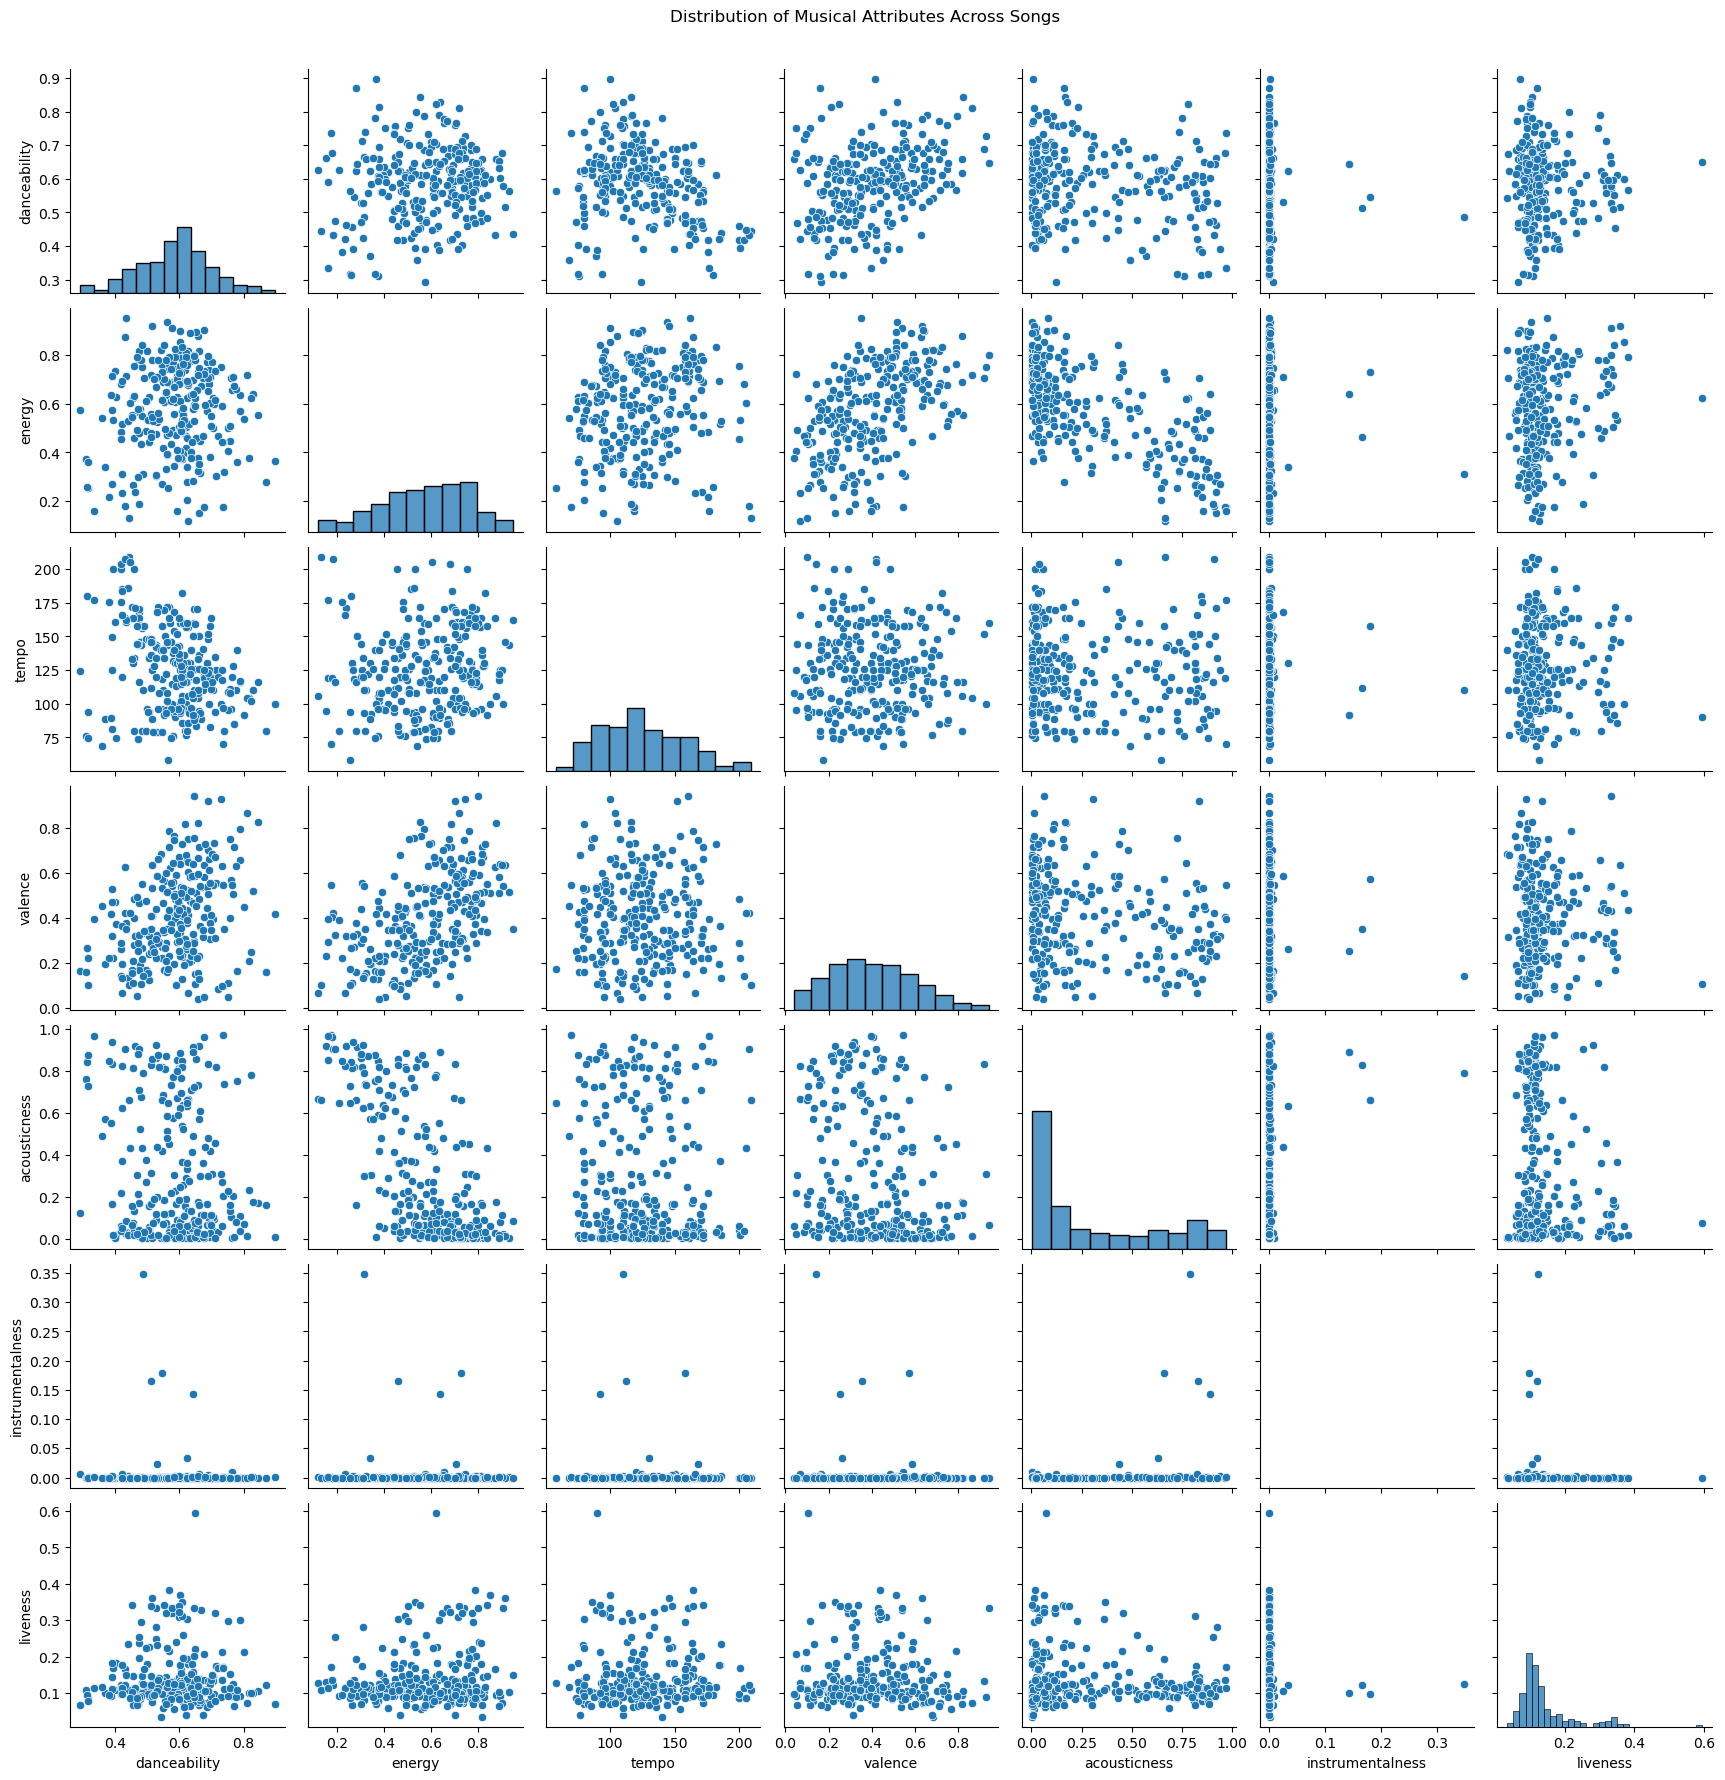

In [58]:
# Displaying distribution plots for Analysis 2 in a separate cell for clarity
sns.pairplot(musical_attr_df)
plt.suptitle('Distribution of Musical Attributes Across Songs', y=1.02)
plt.show()

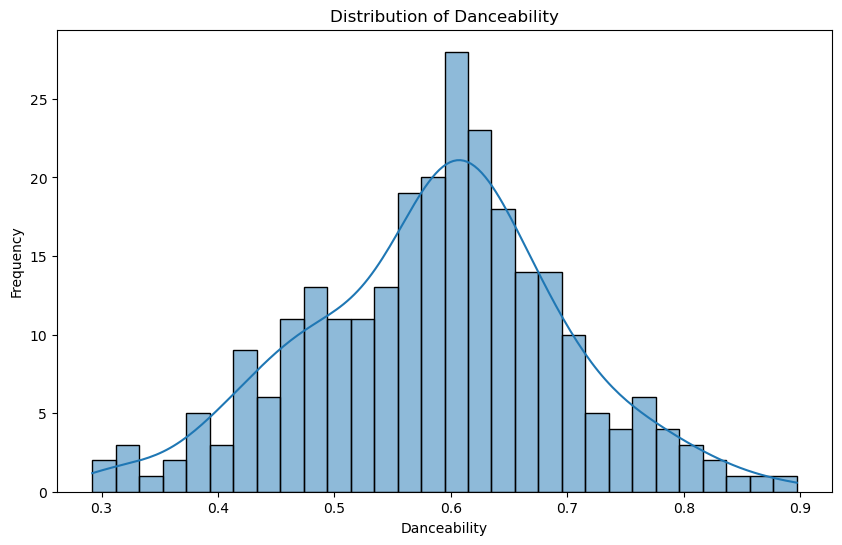

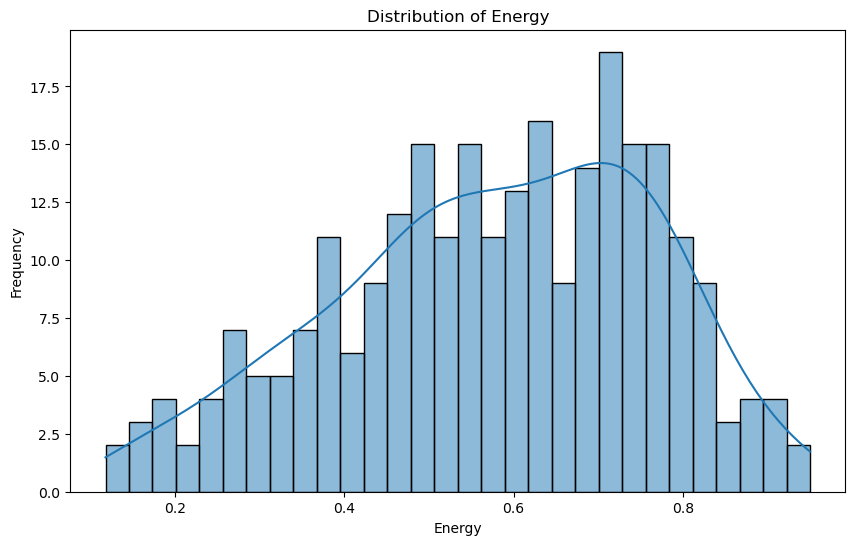

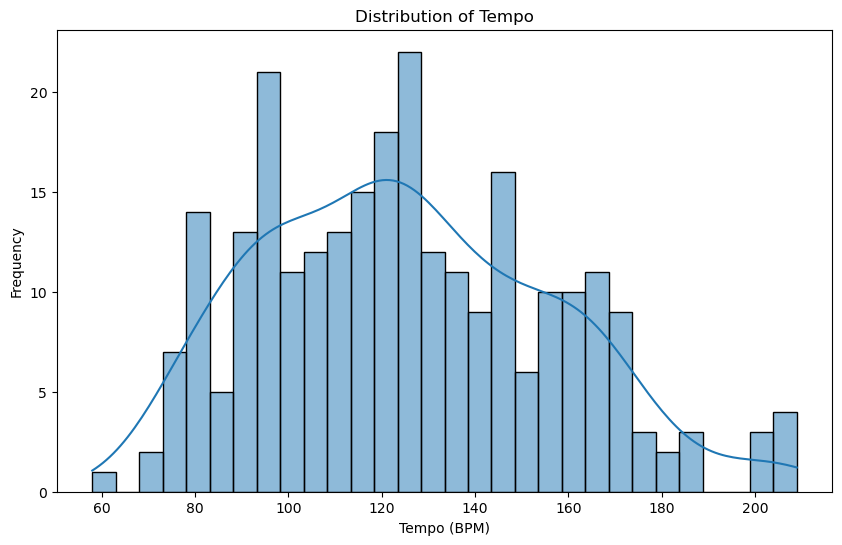

In [61]:
# Creating individual distribution plots for selected musical attributes
# Danceability Distribution
plt.figure(figsize=(10,6))
sns.histplot(songs_df['danceability'], kde=True, bins=30)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

# Energy Distribution
plt.figure(figsize=(10,6))
sns.histplot(songs_df['energy'], kde=True, bins=30)
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

# Tempo Distribution
plt.figure(figsize=(10,6))
sns.histplot(songs_df['tempo'], kde=True, bins=30)
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()

Danceability: This plot shows the distribution of danceability scores across her songs. A higher score indicates a greater suitability for dancing.

Energy: This plot illustrates the distribution of energy levels in her songs. Higher energy values typically represent more intense or upbeat tracks.

Tempo: This plot displays the distribution of tempo (measured in beats per minute, BPM) in her songs. A higher tempo generally indicates a faster-paced song.